In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler 
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.power import TTestIndPower
from statsmodels.api import qqplot
import matplotlib.pyplot as plt
%matplotlib inline

## データ準備

In [2]:
df = sns.load_dataset("tips")
df['tip_rate'] = df['tip'] / df['total_bill']
df

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


# 記述統計

## 分布の描画

In [3]:
df['tip']

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64

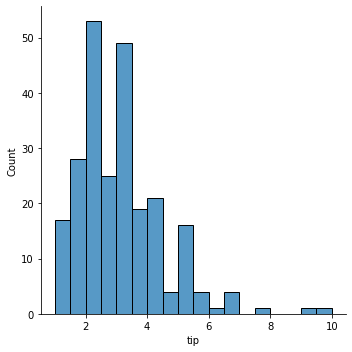

In [5]:
sns.displot(df['tip'], kde=False)

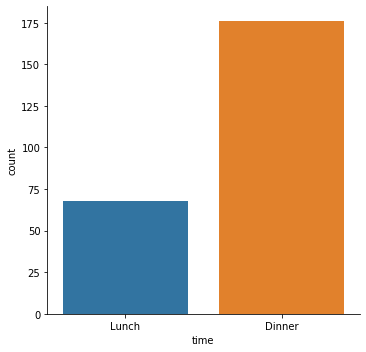

In [6]:
sns.catplot(x='time', data=df, kind='count')

## 平均値

In [7]:
df

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


In [8]:
import numpy as np
np.mean(df['tip_rate'])

0.16080258172250478

In [9]:
df['tip_rate'].mean()

0.16080258172250478

In [10]:
df.groupby('sex').mean()

,total_bill,tip,size,tip_rate
sex,,,,
Male,20.744076,3.089618,2.630573,0.157651
Female,18.056897,2.833448,2.459770,0.166491


In [11]:
df.groupby('sex').mean()['tip_rate']

sex
Male      0.157651
Female    0.166491
Name: tip_rate, dtype: float64

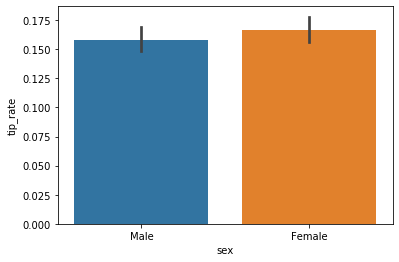

In [12]:
sns.barplot(x='sex', y='tip_rate', data=df)

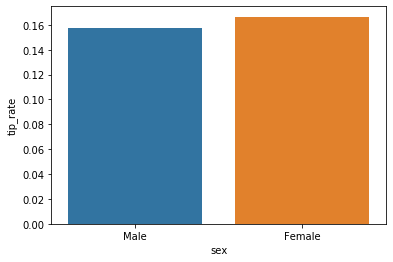

In [13]:
sns.barplot(x='sex', y='tip_rate', data=df, ci=None)

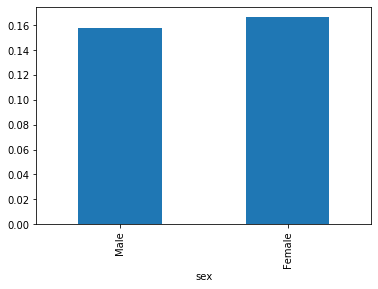

In [14]:
df.groupby('sex').mean()['tip_rate'].plot(kind='bar')

## 中央値

In [15]:
np.median(df['tip_rate'])

0.15476977125802577

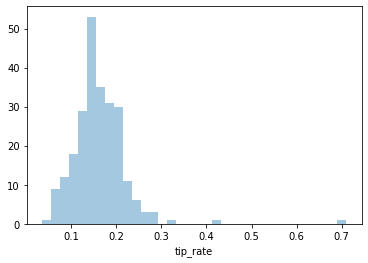

In [16]:
sns.distplot(df['tip_rate'], kde=False)

In [17]:
df['tip_rate'].median()

0.15476977125802577

In [18]:
df.groupby('sex').median()

,total_bill,tip,size,tip_rate
sex,,,,
Male,18.35,3.00,2,0.153492
Female,16.40,2.75,2,0.155581


In [19]:
df.groupby('sex').median()['tip_rate']

sex
Male      0.153492
Female    0.155581
Name: tip_rate, dtype: float64

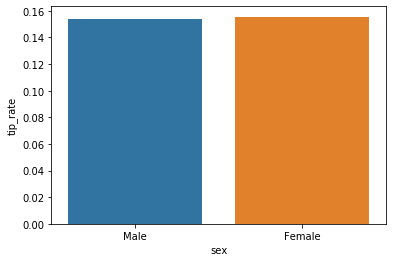

In [20]:
sns.barplot(x='sex', y='tip_rate', data=df, estimator=np.median, ci=None)

平均値0.16080258172250478より中央値0.15476977125802577が小さいのは，
外れ値の影響

In [21]:
df.sort_values('tip_rate', ascending=False)

,total_bill,tip,sex,smoker,day,time,size,tip_rate
172,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345
178,9.60,4.00,Female,Yes,Sun,Dinner,2,0.416667
67,3.07,1.00,Female,Yes,Sat,Dinner,1,0.325733
232,11.61,3.39,Male,No,Sat,Dinner,2,0.291990
183,23.17,6.50,Male,Yes,Sun,Dinner,4,0.280535
...,...,...,...,...,...,...,...,...
187,30.46,2.00,Male,Yes,Sun,Dinner,5,0.065660
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
57,26.41,1.50,Female,No,Sat,Dinner,2,0.056797
102,44.30,2.50,Female,Yes,Sat,Dinner,3,0.056433


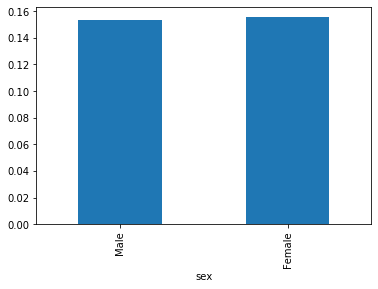

In [22]:
df.groupby('sex').median()['tip_rate'].plot(kind='bar')

## 最頻値

In [23]:
stats.mode([1, 2, 2, 2, 3, 4, 3])

ModeResult(mode=array([2]), count=array([3]))

In [24]:
mode, count = stats.mode([1, 2, 2, 2, 3, 4])
print(mode, count)

[2] [3]


In [25]:
mode, count = stats.mode(df['tip_rate'])
print(mode, count)

[0.14482259] [2]


In [26]:
df['tip_rate'].mode()

0    0.144823
1    0.153846
dtype: float64

## 範囲

In [27]:
np.min(df['tip'])

1.0

In [28]:
df['tip'].min()

1.0

In [29]:
df.groupby('sex').min()

,total_bill,tip,size,tip_rate
sex,,,,
Male,7.25,1.0,1,0.035638
Female,3.07,1.0,1,0.056433


In [30]:
np.max(df['tip'])

10.0

In [31]:
df['tip'].max()

10.0

In [32]:
df.groupby('sex').max()

,total_bill,tip,size,tip_rate
sex,,,,
Male,50.81,10.0,6,0.710345
Female,44.30,6.5,6,0.416667


## 四分位数

In [33]:
np.quantile(df['tip_rate'], [0.25, 0.5, 0.75])

array([0.12912736, 0.15476977, 0.19147549])

In [34]:
df['tip_rate'].quantile([0.25, 0.5, 0.75])

0.25    0.129127
0.50    0.154770
0.75    0.191475
Name: tip_rate, dtype: float64

In [35]:
stats.iqr(df['tip_rate']) / 2

0.03117406229344577

In [36]:
(0.191475 - 0.129127 ) / 2

0.031174000000000007

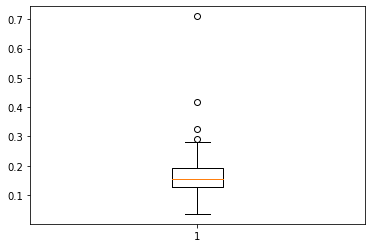

In [42]:
plt.boxplot(df['tip_rate'])
plt.show()

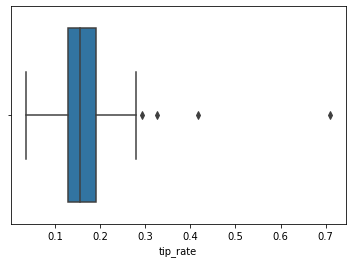

In [43]:
sns.boxplot(df['tip_rate'])

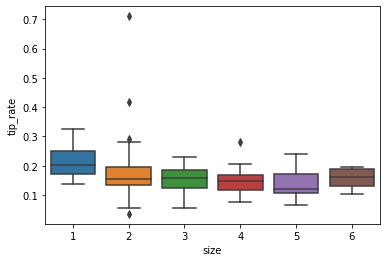

In [46]:
sns.boxplot(x='size', y='tip_rate', data=df)

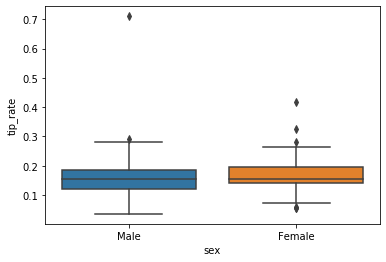

In [47]:
sns.boxplot(x='sex', y='tip_rate', data=df)

## 分散

In [53]:
np.var(df['tip'])

1.9066085124966428

## 標準偏差

In [60]:
s = np.std(df['tip'])
s

1.3807999538298958

In [56]:
np.sqrt(np.var(df['tip'])) # 分散の平方根

1.3807999538298958

In [58]:
tip_mean = df['tip'].mean()
tip_mean # x̄

2.9982786885245902

In [70]:
tip_mean + 3*s # x̄ ± 3s には99～100%のデータが含まれる

7.140678550014278

In [71]:
df['tip'].sort_values(ascending=False)

170    10.00
212     9.00
23      7.58
59      6.73
141     6.70
       ...  
0       1.01
111     1.00
92      1.00
236     1.00
67      1.00
Name: tip, Length: 244, dtype: float64

# 2変数間の記述統計

## 共分散

In [78]:
np.cov([1, 2, 3], [-4, 5, 16], bias=True)

array([[ 0.66666667,  6.66666667],
       [ 6.66666667, 66.88888889]])

In [80]:
np.cov(df['total_bill'], df['tip'], bias=True)

array([[78.92813149,  8.28938892],
       [ 8.28938892,  1.90660851]])

In [87]:
x = np.stack([df['total_bill'], df['tip'], df['size']], axis=0)

In [89]:
x.shape

(3, 244)

In [90]:
np.cov(x, bias=True)

array([[78.92813149,  8.28938892,  5.04522121],
       [ 8.28938892,  1.90660851,  0.64126747],
       [ 5.04522121,  0.64126747,  0.9008835 ]])

## 相関係数

In [91]:
np.corrcoef([1, 4, 5], [5, 6, 8])

array([[1.        , 0.89104211],
       [0.89104211, 1.        ]])

In [92]:
np.corrcoef(df['total_bill'], df['tip'])

array([[1.        , 0.67573411],
       [0.67573411, 1.        ]])

In [93]:
x = np.stack([df['total_bill'], df['tip'], df['size']], axis=0)
np.corrcoef(x)

array([[1.        , 0.67573411, 0.59831513],
       [0.67573411, 1.        , 0.48929878],
       [0.59831513, 0.48929878, 1.        ]])

In [94]:
df.corr()

,total_bill,tip,size,tip_rate
total_bill,1.000000,0.675734,0.598315,-0.338624
tip,0.675734,1.000000,0.489299,0.342370
size,0.598315,0.489299,1.000000,-0.142860
tip_rate,-0.338624,0.342370,-0.142860,1.000000


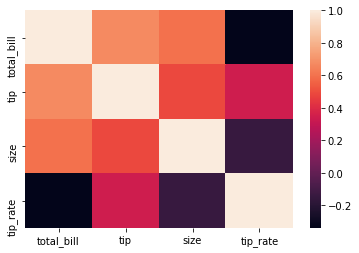

In [95]:
sns.heatmap(df.corr())

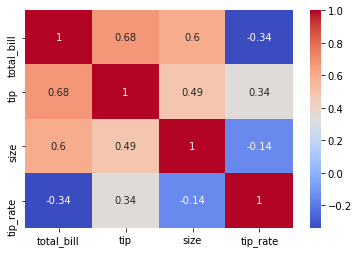

In [96]:
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

## 連関

In [101]:
pd.crosstab(df['sex'], df['time'])

time,Lunch,Dinner
sex,,
Male,33,124
Female,35,52


In [102]:
cont_table = pd.crosstab(df['sex'], df['time'])
stats.chi2_contingency(cont_table, correction=False)

(10.277251918677742,
 0.0013468039268008766,
 1,
 array([[ 43.75409836, 113.24590164],
        [ 24.24590164,  62.75409836]]))

In [151]:
def cramers_v(x, y):
    cont_table = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(cont_table, correction=False)[0]
    min_d = min(cont_table.shape) - 1
    n = len(x)
    v = np.sqrt(chi2/(min_d*n))
    return v

In [152]:
cramers_v(df['sex'], df['time'])

0.20523129613344476

## 確率分布

In [155]:
# random variates(rvs): 確率変量
# randint: 整数を生成する
stats.randint.rvs(1, 7)

1

In [157]:
stats.randint(1, 7).rvs() # これでもOK

2

In [158]:
stats.randint.mean(1, 7)

3.5

In [162]:
stats.uniform(0, 1).rvs()

0.043417228611895786

## 確率分布の描画

In [178]:
def simple_func(x):
    return 2*x*x + 3

In [183]:
x = np.linspace(-3, 3, 100)

In [184]:
x

array([-3.        , -2.93939394, -2.87878788, -2.81818182, -2.75757576,
       -2.6969697 , -2.63636364, -2.57575758, -2.51515152, -2.45454545,
       -2.39393939, -2.33333333, -2.27272727, -2.21212121, -2.15151515,
       -2.09090909, -2.03030303, -1.96969697, -1.90909091, -1.84848485,
       -1.78787879, -1.72727273, -1.66666667, -1.60606061, -1.54545455,
       -1.48484848, -1.42424242, -1.36363636, -1.3030303 , -1.24242424,
       -1.18181818, -1.12121212, -1.06060606, -1.        , -0.93939394,
       -0.87878788, -0.81818182, -0.75757576, -0.6969697 , -0.63636364,
       -0.57575758, -0.51515152, -0.45454545, -0.39393939, -0.33333333,
       -0.27272727, -0.21212121, -0.15151515, -0.09090909, -0.03030303,
        0.03030303,  0.09090909,  0.15151515,  0.21212121,  0.27272727,
        0.33333333,  0.39393939,  0.45454545,  0.51515152,  0.57575758,
        0.63636364,  0.6969697 ,  0.75757576,  0.81818182,  0.87878788,
        0.93939394,  1.        ,  1.06060606,  1.12121212,  1.18

In [181]:
y = simple_func(x)

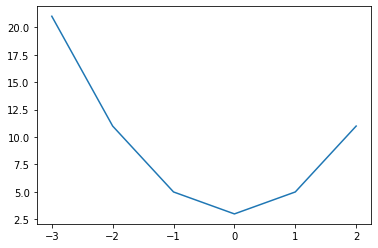

In [182]:
plt.plot(x, y)

In [198]:
x = np.arange(1, 7)
y = stats.randint(1, 7).pmf(x)

In [199]:
x

array([1, 2, 3, 4, 5, 6])

In [200]:
y

array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667])

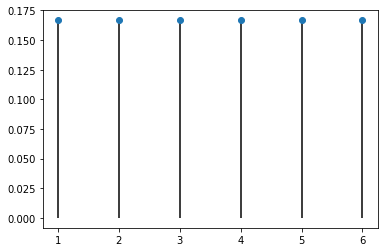

In [201]:
plt.plot(x, y, 'o') # 'o'でプロット（線で繋げない）
plt.vlines(x, 0, y) # (x, ymin, ymax)

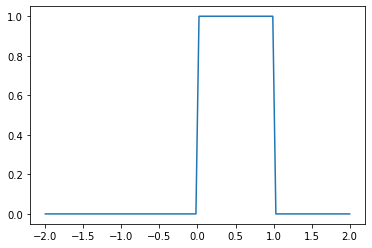

In [211]:
x = np.linspace(-2, 2, 100)
y = stats.uniform(loc=0, scale=1).pdf(x)


In [212]:
x

array([-2.        , -1.95959596, -1.91919192, -1.87878788, -1.83838384,
       -1.7979798 , -1.75757576, -1.71717172, -1.67676768, -1.63636364,
       -1.5959596 , -1.55555556, -1.51515152, -1.47474747, -1.43434343,
       -1.39393939, -1.35353535, -1.31313131, -1.27272727, -1.23232323,
       -1.19191919, -1.15151515, -1.11111111, -1.07070707, -1.03030303,
       -0.98989899, -0.94949495, -0.90909091, -0.86868687, -0.82828283,
       -0.78787879, -0.74747475, -0.70707071, -0.66666667, -0.62626263,
       -0.58585859, -0.54545455, -0.50505051, -0.46464646, -0.42424242,
       -0.38383838, -0.34343434, -0.3030303 , -0.26262626, -0.22222222,
       -0.18181818, -0.14141414, -0.1010101 , -0.06060606, -0.02020202,
        0.02020202,  0.06060606,  0.1010101 ,  0.14141414,  0.18181818,
        0.22222222,  0.26262626,  0.3030303 ,  0.34343434,  0.38383838,
        0.42424242,  0.46464646,  0.50505051,  0.54545455,  0.58585859,
        0.62626263,  0.66666667,  0.70707071,  0.74747475,  0.78

In [213]:
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

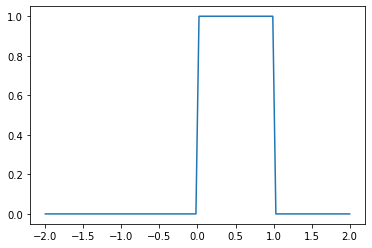

In [214]:
plt.plot(x, y)

## CDF

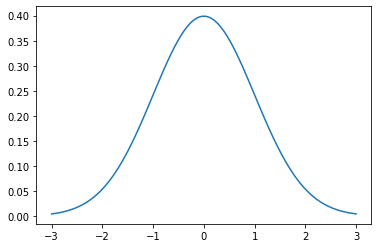

In [218]:
x = np.linspace(-3, 3, 100)
y = stats.norm.pdf(x)
plt.plot(x, y)

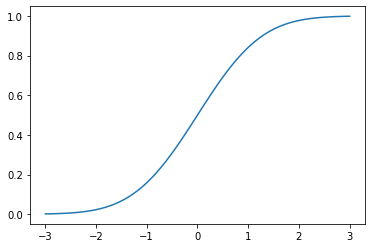

In [219]:
x = np.linspace(-3, 3, 100)
y = stats.norm.cdf(x)
plt.plot(x, y)

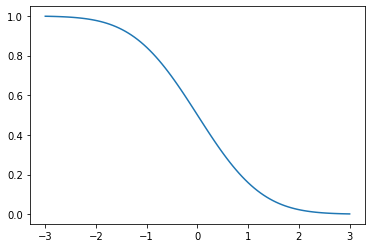

In [220]:
x = np.linspace(-3, 3, 100)
y = stats.norm.sf(x)
plt.plot(x, y)

## 正規分布

In [223]:
stats.norm(loc=10, scale=3).rvs()

13.233863911350996

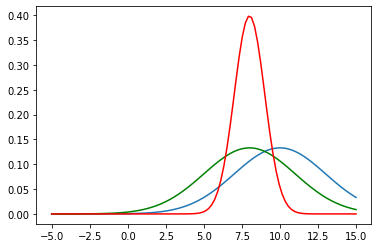

In [240]:
x = np.linspace(-5, 15, 100)
y = stats.norm(loc=10, scale=3).pdf(x)
y2 = stats.norm(loc=8, scale=3).pdf(x)
y3 = stats.norm(loc=8, scale=1).pdf(x)
plt.plot(x, y)
plt.plot(x, y2, color='green')
plt.plot(x, y3, color='red')

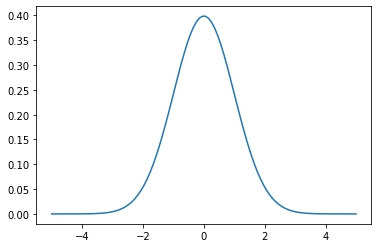

In [235]:
x = np.linspace(-5, 5, 100)
y = stats.norm().pdf(x)
plt.plot(x, y)

## KDE(カーネル密度推定)

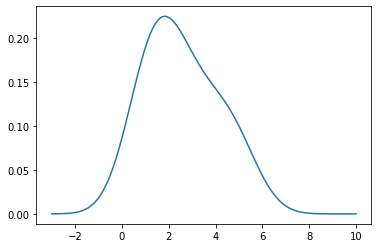

In [256]:
x = np.linspace(-3, 10, 100)
y = stats.gaussian_kde([1, 1, 2, 2, 3, 4, 5]).pdf(x)
plt.plot(x, y)

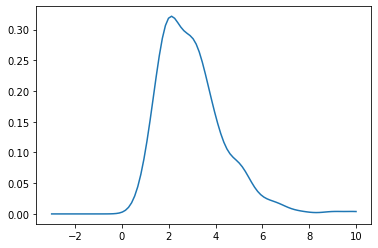

In [253]:
x = np.linspace(-3, 10, 100)
y = stats.gaussian_kde(df['tip']).pdf(x)
plt.plot(x, y)

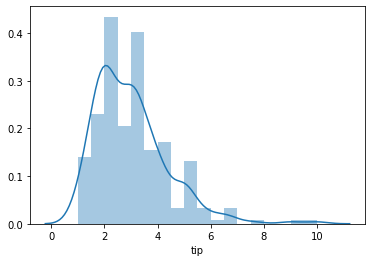

In [258]:
sns.distplot(df['tip'], kde=True)

In [264]:
resample = stats.gaussian_kde(df['tip']).resample()
resample

array([[ 3.25605663,  3.63739589,  2.85893199,  5.40357678,  3.39799341,
         2.21260232,  2.12452504,  3.82355573,  1.66759136,  3.65240667,
         0.33180149,  6.86479899,  2.67179976,  4.0537405 ,  4.37109343,
         2.07826184, 10.16154902,  1.5597121 ,  2.38901902,  3.54303437,
         5.30166118,  2.11428695,  3.74082941,  2.985638  ,  3.65986629,
         2.66357267,  2.28575195,  2.55813463,  3.81532606,  1.92948279,
         3.31337321,  3.05174028,  2.75253227,  2.93459894,  5.88112553,
         2.07520427,  4.98028896,  3.03005367,  5.01964945,  2.7518905 ,
         2.07578437,  4.37492985,  4.55736465,  2.85597923,  1.65168201,
         2.47375145,  3.27448486,  1.28759721,  1.32223253,  4.38659916,
         3.64095315,  2.78103843,  2.36302881,  3.71508679,  3.19103787,
         1.57623922,  3.36269572,  1.55520741,  2.50224193,  1.00277902,
         4.71859198,  2.89634394,  3.05102933,  1.85762376,  4.14255755,
         2.766674  ,  3.52527796,  2.79588365,  1.8

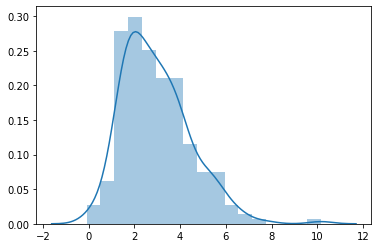

In [268]:
sns.distplot(resample)

## 68-95-99.7ルール

In [283]:
def norm_show_ratio(mean, scale, data_num):
    count1 = 0
    count2 = 0
    count3 = 0
    
    for i in range(data_num):
        x = stats.norm(mean, scale).rvs()
        if mean-scale <=x and x <= mean+scale:
            count1+=1
        if mean-2*scale <=x and x <= mean+2*scale:
            count2+=1
        if mean-3*scale <=x and x <= mean+3*scale:
            count3+=1
    out = (count1/data_num*100, count2/data_num*100, count3/data_num*100)
    return out


norm_show_ratio(4, 3, 1000)

(71.7, 96.89999999999999, 99.8)

In [289]:
def norm_show_ratio(loc, scale, data_num):
    samples = []
    group1 = []
    group2 = []
    group3 = []
    
    for i in range(data_num):
        sample = stats.norm(loc=loc, scale=scale).rvs()
        samples.append(sample)
        if loc-scale <= sample <= loc+scale:
            group1.append(sample)
        elif loc-2*scale <= sample <= loc+2*scale:
            group2.append(sample)
        elif loc-3*scale <= sample <= loc+3*scale:
            group3.append(sample)
    out = (len(group1)/len(samples)*100, (len(group1)+len(group2))/len(samples)*100, (len(group1)+len(group2)+len(group3))/len(samples)*100)
    return out


norm_show_ratio(4, 3, 1000)

(67.9, 96.0, 100.0)

## 標準化

In [290]:
from sklearn.preprocessing import StandardScaler 

In [291]:
scaler = StandardScaler()

In [306]:
scaler.fit_transform([[1], [2], [3], [4]])

array([[-1.34164079],
       [-0.4472136 ],
       [ 0.4472136 ],
       [ 1.34164079]])

In [307]:
df['tip_rate']

0      0.059447
1      0.160542
2      0.166587
3      0.139780
4      0.146808
         ...   
239    0.203927
240    0.073584
241    0.088222
242    0.098204
243    0.159744
Name: tip_rate, Length: 244, dtype: float64

In [361]:
# df['tip_rate'].values

In [309]:
df['tip_rate'].values.shape

(244,)

In [360]:
# df['tip_rate'].values.reshape(-1, 1) # -1でデータの長さが入る

In [312]:
scaled = scaler.fit_transform(df['tip_rate'].values.reshape(-1, 1)) # 1次元は2次元にするためreshapeする

In [359]:
# scaled * 10 + 50

In [315]:
scaled = scaler.fit_transform(df[['total_bill', 'tip_rate']]) # 2次元はreshapeする必要なし

In [358]:
# scaled * 10 + 50

In [317]:
## 二項分布

In [325]:
n = 3
x = np.arange(n+1)
y = stats.binom(n=n, p=1/6).pmf(x)

In [326]:
x

array([0, 1, 2, 3])

In [327]:
y

array([0.5787037 , 0.34722222, 0.06944444, 0.00462963])

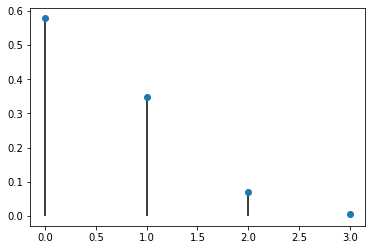

In [330]:
plt.plot(x, y, 'o')
plt.vlines(x, 0, y)

## nを大きくした二項分布

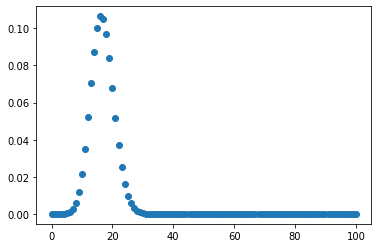

In [355]:
n = 100
p = 1/6
x = np.arange(n+1)
y = stats.binom(n=n, p=p).pmf(x)
plt.plot(x, y, 'o')

In [356]:
stats.binom(n=n, p=p).mean()

16.666666666666664

In [357]:
n*p # 2項分布は，平均と等しい

16.666666666666664

In [342]:
stats.binom(n=n, p=p).var()

13.888888888888888

In [344]:
n*p*(1-p)

13.888888888888888

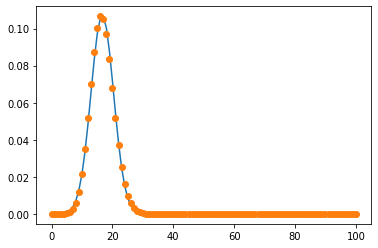

In [348]:
n = 100
p = 1/6
x = np.arange(n+1)
y2 = stats.norm(n*p, np.sqrt(n*p*(1-p))).pdf(x)
plt.plot(x, y2)
plt.plot(x, y, 'o')

## 標本分布

In [364]:
m = 100
n = 50
column = 'tip'
sample_means = []
for i in range(m):
    sampled_df = df.sample(n)
    sample_mean = sampled_df[column].mean()
    sample_means.append(sample_mean)

In [367]:
np.mean(sample_means) # 標本平均

2.999832

In [368]:
df[column].mean() # 母平均

2.9982786885245902

In [369]:
np.var(sample_means) # 標本分散

0.029398836576000016

In [370]:
np.var(df[column])/n # 母分散/n

0.03813217024993285

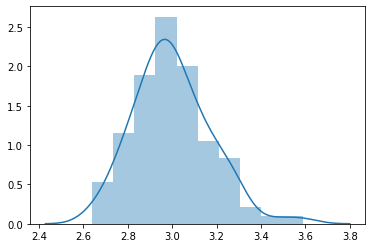

In [366]:
sns.distplot(sample_means)

## 不偏分散

In [377]:
stats.tvar(df['tip']) # 不偏分散

1.914454638062471

In [379]:
np.var(df['tip'])

1.9066085124966428

In [380]:
np.var(df['tip'], ddof=1) # 不偏分散

1.9144546380624725

In [381]:
# 不偏分散の平方根
np.sqrt(stats.tvar(df['tip']))

1.3836381890011822

In [382]:
stats.tstd(df['tip']) # 不偏分散の平方根

1.3836381890011822

In [383]:
np.std(df['tip']) # 標準偏差

1.3807999538298958

In [384]:
np.std(df['tip'], ddof=1) # 不偏分散の平方根

1.3836381890011826

## 不偏分散の不偏性

In [400]:
n = 50
m = 5000
column = 'tip'
sample_vars = []
sample_uvars = []
for i in range(m):
    sample_df = df.sample(n)
    sample_var = np.var(sample_df[column])
    sample_uvar = stats.tvar(sample_df[column])
    sample_vars.append(sample_var)
    sample_uvars.append(sample_uvar)    

In [401]:
np.mean(sample_uvars) # 標本の不偏分散の平均

1.9122458146693877

In [402]:
np.var(df[column]) # 母分散

1.9066085124966428

In [403]:
np.mean(sample_vars) # 標本の分散の平均（小さく評価される）

1.8740008983760004

## 比率の区間推定

In [404]:
stats.binom.interval(0.95, 1000, 0.6)

(570.0, 630.0)

In [427]:
n = 50
m = 100
alpha = 0.95
column = 'sex'
# 母比率(0.643)
population_male_ratio = len(df[df['sex']=='Male']) / len(df)

results = []
for _ in range(m):
    sample_df = df.sample(n)
    male_ratio = len(sample_df[sample_df[column]=='Male'])/len(sample_df)
    min_num, max_num = stats.binom.interval(alpha, n=n, p=male_ratio)
    min_ratio = min_num / n
    max_ratio = max_num / n
    correct = min_ratio < population_male_ratio < max_ratio
    results.append({'min': min_ratio, 'max': max_ratio, 'correct': correct})

In [428]:
result_df = pd.DataFrame(results)

In [429]:
result_df

,min,max,correct
0,0.52,0.78,True
1,0.44,0.72,True
2,0.50,0.76,True
3,0.54,0.80,True
4,0.34,0.62,False
...,...,...,...
95,0.50,0.76,True
96,0.46,0.74,True
97,0.52,0.78,True
98,0.60,0.84,True


In [430]:
result_df['correct'].value_counts()

True     97
False     3
Name: correct, dtype: int64

## 平均の区間推定

In [435]:
n = 50
m = 100
alpha = 0.95
column = 'tip'
# 母平均(2.998)
population_mean = df[column].mean()
results = []

for _ in range(m):
    sample_df = df.sample(n)
    sample_mean = sample_df[column].mean()
    sample_var = stats.tvar(sample_df[column])
    min_val, max_val = stats.norm.interval(alpha, loc=sample_mean, scale=np.sqrt(sample_var/n))
    min_ratio = min_num / n
    max_ratio = max_num / n
    correct = min_val < population_mean < max_val
    results.append({'min': min_val, 'max': max_val, 'correct': correct})

In [434]:
df[column].mean()

2.9982786885245902

In [436]:
result_df = pd.DataFrame(results)

In [437]:
result_df

,min,max,correct
0,2.872782,3.576018,True
1,2.576355,3.404445,True
2,2.471672,3.193528,True
3,2.552260,3.195340,True
4,2.460974,3.323026,True
...,...,...,...
95,2.540543,3.414657,True
96,2.435279,3.084721,True
97,2.470275,3.294925,True
98,2.657466,3.222534,True


In [438]:
result_df['correct'].value_counts()

True     94
False     6
Name: correct, dtype: int64

## t分布

In [439]:
stats.t(1).rvs()

0.5737752112882458

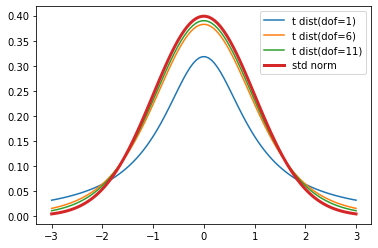

In [444]:
x = np.linspace(-3, 3, 100)
z = stats.norm.pdf(x)
for dof in range(1, 12, 5): # 1~12までの値を5飛ばし→1, 6, 11
    t = stats.t(dof).pdf(x)
    plt.plot(x, t, label=f"t dist(dof={dof})")
plt.plot(x, z, label="std norm", linewidth=3)
plt.legend()

## 平均の区間推定（正規分布 vs t分布）

In [463]:
n = 20
alpha  = 0.95
column = 'tip'
# 母平均(2.998)
population_mean = df[column].mean()
sample_df = df.sample(n)
sample_mean = sample_df[column].mean()
sample_var = stats.tvar(sample_df[column])
# 正規分布
min_val_norm, max_val_norm = stats.norm.interval(alpha, loc=sample_mean, scale=np.sqrt(sample_var/n))
# t分布
min_val_t, max_val_t = stats.t.interval(alpha, loc=sample_mean, scale=np.sqrt(sample_var/n), df=n-1)

In [464]:
sample_mean

3.4315000000000007

In [465]:
print(min_val_norm, max_val_norm)

2.584923707469102 4.2780762925308995


In [466]:
print(min_val_t, max_val_t)

2.527450457184166 4.335549542815835


### 比率の差の検定(z-test)

In [469]:
proportions_ztest([30, 33], [1000, 1000], alternative='smaller')

(-0.3840618481549573, 0.35046630388746547)

## 連関の検定

In [3]:
obs = [[15, 5], [15, 65]]
stats.chi2_contingency(obs, correction=False)

(24.107142857142858,
 9.112167294252327e-07,
 1,
 array([[ 6., 14.],
        [24., 56.]]))

## Z検定とカイ二乗検定

In [8]:
n = 50
sample_df1 = df.sample(n)
sample_df2 = df.sample(n)

In [11]:
count1 = sample_df1['time'].value_counts()['Dinner']
count2 = sample_df2['time'].value_counts()['Dinner']

In [13]:
# Z検定
proportions_ztest([count1, count2], [n, n], alternative='two-sided')

(0.44543540318737435, 0.6560051321908608)

In [16]:
sample_df1['time'].value_counts()

Dinner    37
Lunch     13
Name: time, dtype: int64

In [17]:
## 分割表の作成
sample1_freq = sample_df1['time'].value_counts().values
sample2_freq = sample_df2['time'].value_counts().values

In [20]:
[sample1_freq, sample2_freq]

[array([37, 13]), array([35, 15])]

In [21]:
# カイ二乗検定
stats.chi2_contingency([sample1_freq, sample2_freq], correction=False)

(0.1984126984126984,
 0.6560051321908611,
 1,
 array([[36., 14.],
        [36., 14.]]))

In [23]:
## 平均値差の検定（t検定）

In [27]:
male_tips = df[df['sex']=='Male']['tip_rate']
female_tips = df[df['sex']=='Female']['tip_rate']

In [38]:
print(np.var(male_tips), np.var(female_tips))

0.004169445577529407 0.0028433004255488206


In [28]:
print(np.mean(male_tips), np.mean(female_tips))

0.15765054700429748 0.16649073632892475


In [31]:
# スチューデントのt検定
stats.ttest_ind(male_tips, female_tips, equal_var=True)

Ttest_indResult(statistic=-1.0833972270477996, pvalue=0.2797103849605489)

In [32]:
# ウェルチのt検定
stats.ttest_ind(male_tips, female_tips, equal_var=False)

Ttest_indResult(statistic=-1.1432770167349968, pvalue=0.2542456188927583)

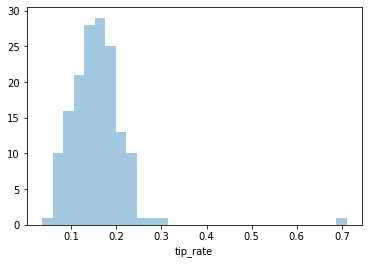

In [35]:
sns.distplot(male_tips, kde=False)

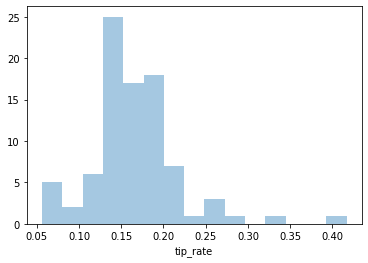

In [36]:
sns.distplot(female_tips, kde=False)

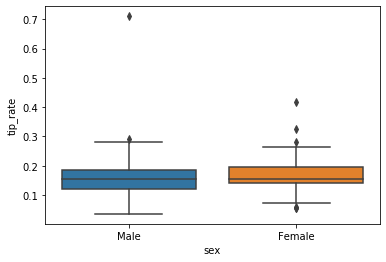

In [37]:
sns.boxplot(data=df, x='sex', y='tip_rate')

In [39]:
## Q-Qプロット

In [42]:
## ↓これらが正規分布であるかどうか

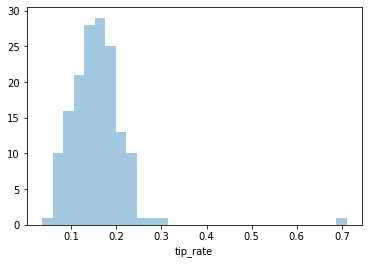

In [40]:
sns.distplot(male_tips, kde=False)

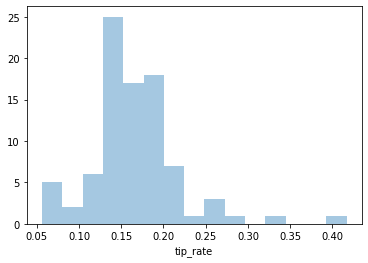

In [41]:
sns.distplot(female_tips, kde=False)

In [54]:
male_tipr = df[df['sex']=='Male']['tip_rate']
female_tipr = df[df['sex']=='Female']['tip_rate']

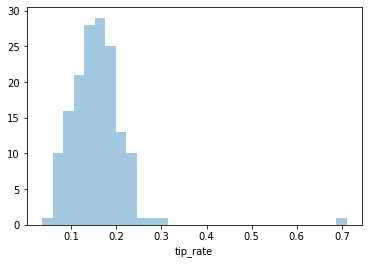

In [46]:
sns.distplot(male_tipr, kde=False)

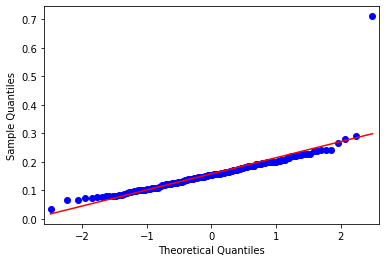

In [52]:
fig = qqplot(male_tipr, line='r')
# デフォルトではdistは標準正規分布

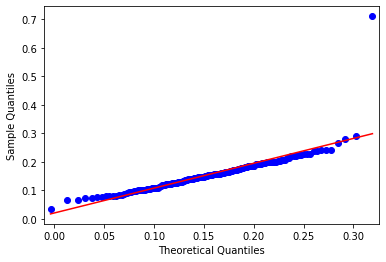

In [50]:
# 標本の平均，標本の標準偏差の正規分布にどれくらい近いか
fig = qqplot(male_tipr, line='r',
             dist=stats.norm(loc=np.mean(male_tipr), scale=np.sqrt(stats.tvar(male_tipr))))

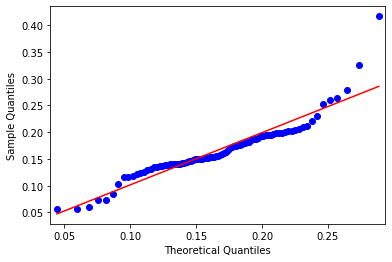

In [55]:
fig = qqplot(female_tipr, line='r',
             dist=stats.norm(loc=np.mean(female_tipr), scale=np.sqrt(stats.tvar(female_tipr))))

In [56]:
## シャピロ-ウィルクの検定

In [66]:
male_tipr = df[df['sex']=='Male']['tip_rate']
female_tipr = df[df['sex']=='Female']['tip_rate']

In [58]:
stats.shapiro(male_tips)

(0.7447847127914429, 3.2243281107541917e-15)

In [59]:
stats.shapiro(female_tips)

(0.8982974290847778, 4.717996489489451e-06)

In [60]:
np.sort(male_tipr)

array([0.03563814, 0.06565988, 0.0665336 , 0.07180385, 0.07398274,
       0.07717751, 0.07745933, 0.07861635, 0.0789266 , 0.07936508,
       0.0814664 , 0.08329863, 0.08364236, 0.08822232, 0.09001406,
       0.09452888, 0.09553024, 0.09560229, 0.09820426, 0.09935739,
       0.09984301, 0.10116338, 0.10181582, 0.10251227, 0.1035554 ,
       0.10379905, 0.10506961, 0.10620491, 0.10647182, 0.10657194,
       0.10677083, 0.10789981, 0.1117943 , 0.11607143, 0.11773472,
       0.11774956, 0.11893435, 0.12038523, 0.12128563, 0.12138869,
       0.12262416, 0.12359551, 0.12413108, 0.12468828, 0.125     ,
       0.12539185, 0.12703379, 0.1282437 , 0.12942192, 0.13031915,
       0.13049096, 0.13138686, 0.13181019, 0.13623978, 0.13636364,
       0.13649025, 0.13812155, 0.13924051, 0.13942407, 0.13965087,
       0.13978041, 0.14177694, 0.14191107, 0.14192496, 0.14278915,
       0.14482259, 0.14482259, 0.14547537, 0.14662757, 0.14669927,
       0.14705882, 0.14803849, 0.14958863, 0.14962594, 0.15008

In [67]:
stats.shapiro(np.sort(male_tipr)[:-1])

(0.9931070804595947, 0.6644759774208069)

In [68]:
np.sort(female_tipr)

array([0.05643341, 0.05679667, 0.05944673, 0.07296137, 0.07358352,
       0.08527132, 0.10252157, 0.11598237, 0.11690246, 0.11841469,
       0.12126246, 0.12338063, 0.12518629, 0.13019892, 0.13033771,
       0.13428827, 0.13553475, 0.13732098, 0.13774105, 0.13793103,
       0.13961519, 0.13998783, 0.14084507, 0.1409396 , 0.14134276,
       0.14140774, 0.14180374, 0.14285714, 0.14481094, 0.14680765,
       0.14688602, 0.14843526, 0.14935506, 0.14938236, 0.15      ,
       0.15015198, 0.15203022, 0.15243902, 0.15267176, 0.15365704,
       0.15384615, 0.15384615, 0.15521855, 0.15558149, 0.1577708 ,
       0.15974441, 0.16166505, 0.16313214, 0.16746411, 0.17133067,
       0.1721943 , 0.17391304, 0.17476489, 0.17574692, 0.17574692,
       0.17798467, 0.17964072, 0.18133491, 0.1817279 , 0.18484288,
       0.18773467, 0.18814675, 0.18839488, 0.19283747, 0.19361084,
       0.19492158, 0.19502868, 0.19505852, 0.19611415, 0.19778481,
       0.19821606, 0.19920319, 0.20034345, 0.20192308, 0.20219

In [71]:
stats.shapiro(np.sort(female_tipr)[:-1])

(0.9585995078086853, 0.00757835665717721)

In [72]:
stats.shapiro(np.sort(female_tipr)[:-2])

(0.9696651697158813, 0.04252713546156883)

In [73]:
stats.shapiro(np.sort(female_tipr)[:-3])

(0.9694060683250427, 0.04287996515631676)

## F分布

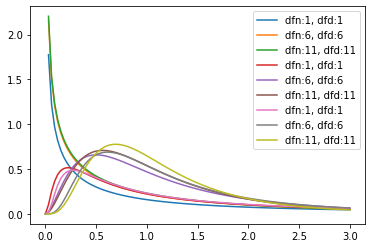

In [78]:
x = np.linspace(0, 3, 100)
for dfn in range(1, 12, 5):
    for dfd in range(1, 12, 5):
        y = stats.f(dfn, dfd).pdf(x)
        plt.plot(x, y, label=f'dfn:{dfd}, dfd:{dfd}')
plt.legend()    

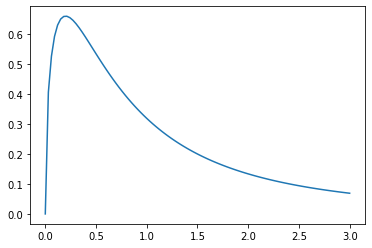

In [77]:
plt.plot(x, y)

## F検定

In [79]:
male_tipr = df[df['sex']=='Male']['tip_rate']
female_tipr = df[df['sex']=='Female']['tip_rate']

In [83]:
print(stats.tvar(male_tipr), stats.tvar(female_tipr))

0.004196172792769981 0.002876362058404039


In [85]:
n1 = len(male_tipr)
n2 = len(female_tipr)
dfn = n1 -1
dfd = n2-1
var1 = stats.tvar(male_tipr)
var2 = stats.tvar(female_tipr)
f = var1/ var2 # 大きいほうが分子
print(f)

1.4588472200534603


In [94]:
stats.f(dfn=dfn, dfd=dfd).sf(f)

0.027100863454374447

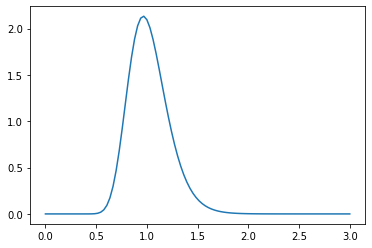

In [88]:
x = np.linspace(0, 3, 100)
y = stats.f(dfn=dfn, dfd=dfd).pdf(x)
plt.plot(x, y)

## 対応ありの平均偏差の検定

In [97]:
bp_df = pd.read_csv('data/blood_pressure.csv')

In [98]:
bp_df

,patient,sex,agegrp,bp_before,bp_after
0,1,Male,30-45,143,153
1,2,Male,30-45,163,170
2,3,Male,30-45,153,168
3,4,Male,30-45,153,142
4,5,Male,30-45,146,141
...,...,...,...,...,...
115,116,Female,60+,152,152
116,117,Female,60+,161,152
117,118,Female,60+,165,174
118,119,Female,60+,149,151


In [99]:
stats.ttest_rel(bp_df['bp_before'], bp_df['bp_after'])

Ttest_relResult(statistic=3.3371870510833657, pvalue=0.0011297914644840823)

In [101]:
stats.ttest_rel(bp_df['bp_before'], bp_df['bp_after'], alternative='greater')

TypeError: ttest_rel() got an unexpected keyword argument 'alternative'

In [102]:
bp_df['delta'] = bp_df['bp_before'] - bp_df['bp_after']

In [103]:
bp_df['delta'].mean()

5.091666666666667

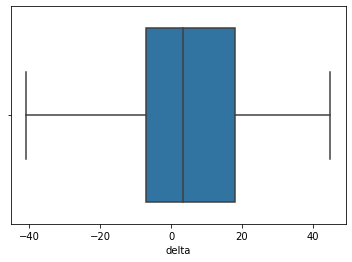

In [104]:
sns.boxplot(bp_df['delta'])

## Cohen's d

In [113]:
def cohen_d(x1, x2):
    n1 = len(x1)
    n2 = len(x2)
    dof = n1 + n2 -2
    std = np.sqrt(((n1-1)*stats.tvar(x1) + (n2-1)*stats.tvar(x2))/dof)
    return np.abs((np.mean(x1) - np.mean(x2)))/std

In [114]:
male_tip_rate = df[df['sex']=='Male']['tip_rate']
female_tip_rate = df[df['sex']=='Female']['tip_rate']

In [115]:
cohen_d(male_tip_rate, female_tip_rate)

0.14480153987269248

## 検定力分析

In [117]:
power = TTestIndPower()

In [118]:
male_tip_rate = df[df['sex']=='Male']['tip_rate']
female_tip_rate = df[df['sex']=='Female']['tip_rate']

In [120]:
stats.ttest_ind(male_tip_rate, female_tip_rate, equal_var=False) # ウェルチのt検定

Ttest_indResult(statistic=-1.1432770167349968, pvalue=0.2542456188927583)

In [123]:
effect_size = cohen_d(male_tip_rate, female_tip_rate)
n1 = len(male_tip_rate)
n2 = len(female_tip_rate)
ratio=n2/n1
stats_power = power.solve_power(effect_size=effect_size, nobs1=n1, alpha=0.05, power=None, ratio=ratio, alternative='two-sided')
stats_power

0.19038260700802212

In [124]:
power.solve_power(effect_size=effect_size, nobs1=None, alpha=0.05, power=0.8, ratio=ratio, alternative='two-sided')

1051.0959553846506

In [131]:
n2/n1 * 1051

582.4012738853503

In [132]:
power.solve_power(effect_size=0.2, nobs1=None, alpha=0.05, power=0.8, ratio=1, alternative='two-sided')

393.4056989990335

## 検定力の推移

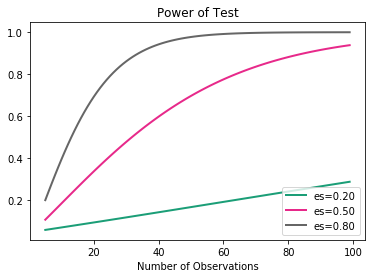

In [142]:
fig = power.plot_power(dep_var='nobs', nobs=np.array(range(5, 100)), effect_size=[0.2, 0.5, 0.8], alpha=0.05)

In [134]:
np.array(range(5, 100)) # nobsはlist(range(5, 100))ではだめ np.arrayにする

array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55,
       56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72,
       73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89,
       90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [139]:
np.li

array([1.        , 1.28571429, 1.57142857, 1.85714286, 2.14285714,
       2.42857143, 2.71428571, 3.        , 3.28571429, 3.57142857,
       3.85714286, 4.14285714, 4.42857143, 4.71428571, 5.        ])